In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from importlib import reload
from mppi import InputFiles as I, Calculators as C, Datasets as D

# Analysis of the spin polarization

We perform the analysis of the spin polarization for the neq distribution using the ypp_rt post-processing data.

We consider the various samplings of the k-points

## k = 8x8x8 - width = 40 fs

In [2]:
data_dir = 'rt_k8_width40/FixSymm'
last_time = '240.000'

In [3]:
# circular polarization spanning a given frequencies range
freq_range = [1.15,1.25,1.35,1.45,1.55,1.65,1.75,1.85]
# linear polarization for a single frequency
lin_freq = 1.55
# reversed circular polarization for a single frequency
reversed_circ_freq = 1.55

We compute the total number of electrons in the conduction band, for a given frequency, (at the last simulation time) for each spin polarization

In [4]:
f = freq_range[4]
print('frequency = ',f)
file_tot = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_DATA'%(f,f)
file_up = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_up_DATA'%(f,f)
file_dn = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_dn_DATA'%(f,f)
data_tot = C.dict_parser(file_tot)
data_up = C.dict_parser(file_up)
data_dn = C.dict_parser(file_dn)

frequency =  1.55


In [5]:
energies = data_tot['E']
carriers_up = data_up[last_time]
carriers_dn = data_dn[last_time]
carriers_tot = data_tot[last_time]

(-0.005, 0.005)

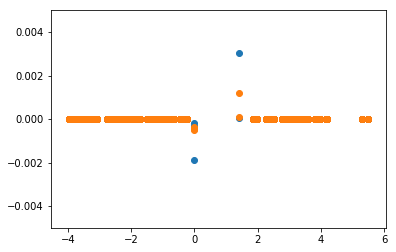

In [6]:
plt.scatter(energies,carriers_up)
plt.scatter(energies,carriers_dn)
plt.ylim((-0.005,0.005))

See how the spin polarization emerges at E=1.418

In [7]:
val_indexes = []
cond_indexes = []

for ind,e in enumerate(energies):
    if e == 0.0:
        val_indexes.append(ind)

for ind,e in enumerate(energies):
    if e == 1.418:
        cond_indexes.append(ind)

print(val_indexes,cond_indexes)

[2044, 2045, 2046, 2047] [2048, 2049]


In [8]:
val_up  = [carriers_up[i] for i in val_indexes]
val_dn  = [carriers_dn[i] for i in val_indexes]
cond_up  = [carriers_up[i] for i in cond_indexes]
cond_dn  = [carriers_dn[i] for i in cond_indexes]

In [9]:
sum_cond_up = sum(cond_up)
sum_cond_dn = sum(cond_dn)
print('Total carriers',sum_cond_up+sum_cond_dn)
spin_pol_cond = (sum_cond_up-sum_cond_dn)/(sum_cond_up+sum_cond_dn)*100
sum_val_up = sum(val_up)
sum_val_dn = sum(val_dn)
spin_pol_val = (sum_val_up-sum_val_dn)/(sum_val_up+sum_val_dn)*100
print(spin_pol_cond,spin_pol_val)

Total carriers 0.004394830000000001
40.48461487702596 22.89556926017795


The total number of carriers in the conduction band is computed by integrating the carriers for energies > 0

In [ ]:
cond_thrs = cond_indexes[0]

and the associated spin polarization is

In [58]:
tot_cond_up = sum(carriers_up[cond_thrs:])
tot_cond_dn = sum(carriers_dn[cond_thrs:])
tot_spin_pol_cond = (tot_cond_up-tot_cond_dn)/(tot_cond_up+tot_cond_dn)*100
tot_val_up = sum(carriers_up[0:cond_thrs])
tot_val_dn = sum(carriers_dn[0:cond_thrs])
tot_spin_pol_val = (tot_val_up-tot_val_dn)/(tot_val_up+tot_val_dn)*100
print(tot_spin_pol_cond,tot_spin_pol_val)

39.53066138564004 22.499684393721285


We compute the (conduction) spin polarization for all the frequency range

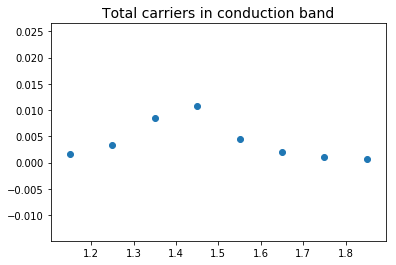

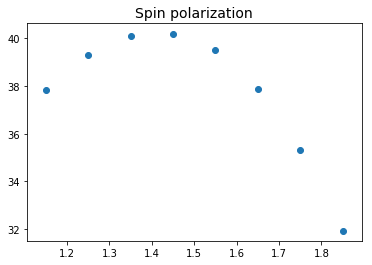

In [60]:
spin_pol = []
total_cond = []
for f in freq_range:
    file_tot = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_DATA'%(f,f)
    file_up = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_up_DATA'%(f,f)
    file_dn = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_dn_DATA'%(f,f)
    data_tot = C.dict_parser(file_tot)
    data_up = C.dict_parser(file_up)
    data_dn = C.dict_parser(file_dn)
    energies = data_tot['E']
    carriers_up = data_up[last_time]
    carriers_dn = data_dn[last_time]
    carriers_tot = data_tot[last_time]
    cond_thrs = 0
    for e in energies:
        if e>0:
            cond_thrs = energies.index(e)
            break
    tot_cond_up = sum(carriers_up[cond_thrs:])
    tot_cond_dn = sum(carriers_dn[cond_thrs:])
    cond_tot = sum(carriers_tot[cond_thrs:])
    total_cond.append(cond_tot)
    tot_spin_pol_cond = (tot_cond_up-tot_cond_dn)/(tot_cond_up+tot_cond_dn)*100
    spin_pol.append(tot_spin_pol_cond)
plt.scatter(freq_range,total_cond)
plt.title('Total carriers in conduction band',size = 14)
plt.show()
plt.title('Spin polarization',size = 14)
plt.scatter(freq_range,spin_pol)

## k = 8x8x8 - width = 100 fs

In [18]:
data_dir = 'rt_k8_width100/FixSymm'
last_time = '600.000'

In [19]:
# circular polarization spanning a given frequencies range
freq_range = [1.15,1.25,1.35,1.45,1.55,1.65,1.75,1.85]
# linear polarization for a single frequency
lin_freq = 1.55
# reversed circular polarization for a single frequency
reversed_circ_freq = 1.55

We compute the total number of electrons in the conduction band, for a given frequency, (at the last simulation time) for each spin polarization

In [20]:
f = freq_range[4]
print('frequency = ',f)
file_tot = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_DATA'%(f,f)
file_up = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_up_DATA'%(f,f)
file_dn = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_dn_DATA'%(f,f)
data_tot = C.dict_parser(file_tot)
data_up = C.dict_parser(file_up)
data_dn = C.dict_parser(file_dn)

frequency =  1.55


In [21]:
energies = data_tot['E']
carriers_up = data_up[last_time]
carriers_dn = data_dn[last_time]
carriers_tot = data_tot[last_time]

(-0.01, 0.01)

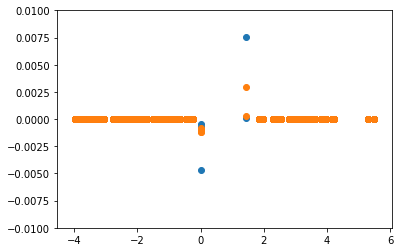

In [22]:
plt.scatter(energies,carriers_up)
plt.scatter(energies,carriers_dn)
plt.ylim((-0.01,0.01))

See how the spin polarization emerges at E=1.418

In [23]:
val_indexes = []
cond_indexes = []

for ind,e in enumerate(energies):
    if e == 0.0:
        val_indexes.append(ind)

for ind,e in enumerate(energies):
    if e == 1.418:
        cond_indexes.append(ind)

print(val_indexes,cond_indexes)

[2044, 2045, 2046, 2047] [2048, 2049]


In [24]:
val_up  = [carriers_up[i] for i in val_indexes]
val_dn  = [carriers_dn[i] for i in val_indexes]
cond_up  = [carriers_up[i] for i in cond_indexes]
cond_dn  = [carriers_dn[i] for i in cond_indexes]

In [25]:
sum_cond_up = sum(cond_up)
sum_cond_dn = sum(cond_dn)
print('Total carriers',sum_cond_up+sum_cond_dn)
spin_pol_cond = (sum_cond_up-sum_cond_dn)/(sum_cond_up+sum_cond_dn)*100
sum_val_up = sum(val_up)
sum_val_dn = sum(val_dn)
spin_pol_val = (sum_val_up-sum_val_dn)/(sum_val_up+sum_val_dn)*100
print(spin_pol_cond,spin_pol_val)

Total carriers 0.0108819
40.41114143669764 22.858376749271805


The total number of carriers in the conduction band is computed by integrating the carriers for energies > 0

In [72]:
cond_thrs = cond_indexes[0]

and the associated spin polarization is

In [73]:
tot_cond_up = sum(carriers_up[cond_thrs:])
tot_cond_dn = sum(carriers_dn[cond_thrs:])
tot_spin_pol_cond = (tot_cond_up-tot_cond_dn)/(tot_cond_up+tot_cond_dn)*100
tot_val_up = sum(carriers_up[0:cond_thrs])
tot_val_dn = sum(carriers_dn[0:cond_thrs])
tot_spin_pol_val = (tot_val_up-tot_val_dn)/(tot_val_up+tot_val_dn)*100
print(tot_spin_pol_cond,tot_spin_pol_val)

39.450126575281246 22.460042246526204


We compute the (conduction) spin polarization for all the frequency range

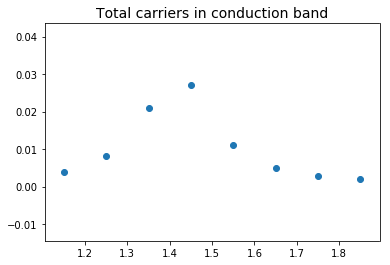

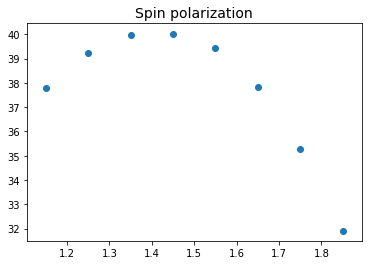

In [74]:
spin_pol = []
total_cond = []
for f in freq_range:
    file_tot = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_DATA'%(f,f)
    file_up = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_up_DATA'%(f,f)
    file_dn = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_dn_DATA'%(f,f)
    data_tot = C.dict_parser(file_tot)
    data_up = C.dict_parser(file_up)
    data_dn = C.dict_parser(file_dn)
    energies = data_tot['E']
    carriers_up = data_up[last_time]
    carriers_dn = data_dn[last_time]
    carriers_tot = data_tot[last_time]
    cond_thrs = 0
    for e in energies:
        if e>0:
            cond_thrs = energies.index(e)
            break
    tot_cond_up = sum(carriers_up[cond_thrs:])
    tot_cond_dn = sum(carriers_dn[cond_thrs:])
    cond_tot = sum(carriers_tot[cond_thrs:])
    total_cond.append(cond_tot)
    tot_spin_pol_cond = (tot_cond_up-tot_cond_dn)/(tot_cond_up+tot_cond_dn)*100
    spin_pol.append(tot_spin_pol_cond)
plt.scatter(freq_range,total_cond)
plt.title('Total carriers in conduction band',size = 14)
plt.show()
plt.title('Spin polarization',size = 14)
plt.scatter(freq_range,spin_pol)

## k = 8x8x8 - no commutator

In [10]:
data_dir = 'rt_k8_no-commutator/FixSymm'
last_time = '240.000'

In [11]:
# circular polarization spanning a given frequencies range
freq_range =[1.418,1.55]
# linear polarization for a single frequency
lin_freq = 1.55
# reversed circular polarization for a single frequency
reversed_circ_freq = 1.55

We compute the total number of electrons in the conduction band, for a given frequency, (at the last simulation time) for each spin polarization

In [12]:
f = freq_range[1]
print('frequency = ',f)
file_tot = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_DATA'%(f,f)
file_up = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_up_DATA'%(f,f)
file_dn = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_dn_DATA'%(f,f)
data_tot = C.dict_parser(file_tot)
data_up = C.dict_parser(file_up)
data_dn = C.dict_parser(file_dn)

frequency =  1.55


In [13]:
energies = data_tot['E']
carriers_up = data_up[last_time]
carriers_dn = data_dn[last_time]
carriers_tot = data_tot[last_time]

(-0.005, 0.005)

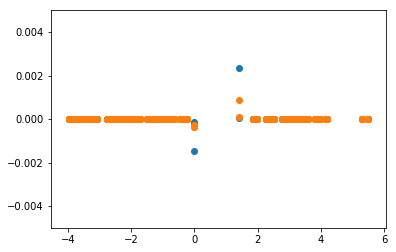

In [14]:
plt.scatter(energies,carriers_up)
plt.scatter(energies,carriers_dn)
plt.ylim((-0.005,0.005))

See how the spin polarization emerges at E=1.418

In [15]:
val_indexes = []
cond_indexes = []

for ind,e in enumerate(energies):
    if e == 0.0:
        val_indexes.append(ind)

for ind,e in enumerate(energies):
    if e == 1.418:
        cond_indexes.append(ind)

print(val_indexes,cond_indexes)

[2044, 2045, 2046, 2047] [2048, 2049]


In [16]:
val_up  = [carriers_up[i] for i in val_indexes]
val_dn  = [carriers_dn[i] for i in val_indexes]
cond_up  = [carriers_up[i] for i in cond_indexes]
cond_dn  = [carriers_dn[i] for i in cond_indexes]

In [17]:
sum_cond_up = sum(cond_up)
sum_cond_dn = sum(cond_dn)
print('Total carriers',sum_cond_up+sum_cond_dn)
spin_pol_cond = (sum_cond_up-sum_cond_dn)/(sum_cond_up+sum_cond_dn)*100
sum_val_up = sum(val_up)
sum_val_dn = sum(val_dn)
spin_pol_val = (sum_val_up-sum_val_dn)/(sum_val_up+sum_val_dn)*100
print(spin_pol_cond,spin_pol_val)

Total carriers 0.0033511799999999996
42.68944073430851 23.41390629662787


## k = 4x4x4

In [18]:
data_dir = 'rt_k4_width40/FixSymm'
last_time = '240.000'

In [19]:
# circular polarization spanning a given frequencies range
freq_range =[1.418,1.55]
# linear polarization for a single frequency
lin_freq = 1.55
# reversed circular polarization for a single frequency
reversed_circ_freq = 1.55

We compute the total number of electrons in the conduction band, for a given frequency, (at the last simulation time) for each spin polarization

In [20]:
f = freq_range[1]
print('frequency = ',f)
file_tot = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_DATA'%(f,f)
file_up = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_up_DATA'%(f,f)
file_dn = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_dn_DATA'%(f,f)
data_tot = C.dict_parser(file_tot)
data_up = C.dict_parser(file_up)
data_dn = C.dict_parser(file_dn)

frequency =  1.55


In [21]:
energies = data_tot['E']
carriers_up = data_up[last_time]
carriers_dn = data_dn[last_time]
carriers_tot = data_tot[last_time]

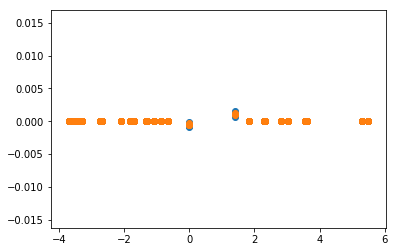

In [22]:
plt.scatter(energies,carriers_up)
plt.scatter(energies,carriers_dn)
#plt.ylim((-0.0005,0.0005))

See how the spin polarization emerges at E=1.418

In [23]:
val_indexes = []
cond_indexes = []

for ind,e in enumerate(energies):
    if e == 0.0:
        val_indexes.append(ind)

for ind,e in enumerate(energies):
    if e == 1.418:
        cond_indexes.append(ind)

print(val_indexes,cond_indexes)

[252, 253, 254, 255] [256, 257]


In [24]:
val_up  = [carriers_up[i] for i in val_indexes]
val_dn  = [carriers_dn[i] for i in val_indexes]
cond_up  = [carriers_up[i] for i in cond_indexes]
cond_dn  = [carriers_dn[i] for i in cond_indexes]

In [26]:
sum_cond_up = sum(cond_up)
sum_cond_dn = sum(cond_dn)
print('Total carriers',sum_cond_up+sum_cond_dn)
spin_pol_cond = (sum_cond_up-sum_cond_dn)/(sum_cond_up+sum_cond_dn)*100
sum_val_up = sum(val_up)
sum_val_dn = sum(val_dn)
spin_pol_val = (sum_val_up-sum_val_dn)/(sum_val_up+sum_val_dn)*100
print(spin_pol_cond,spin_pol_val)

Total carriers 0.0043956
3.9039039039039047 14.877063351957345


## k = 12x12x12

In [2]:
data_dir = 'rt_k12_width40/FixSymm'
last_time = '240.000'

In [3]:
# circular polarization spanning a given frequencies range
freq_range =[1.418,1.55]
# linear polarization for a single frequency
lin_freq = 1.55
# reversed circular polarization for a single frequency
reversed_circ_freq = 1.55

We compute the total number of electrons in the conduction band, for a given frequency, (at the last simulation time) for each spin polarization

In [4]:
f = freq_range[1]
print('frequency = ',f)
file_tot = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_DATA'%(f,f)
file_up = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_up_DATA'%(f,f)
file_dn = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_dn_DATA'%(f,f)
data_tot = C.dict_parser(file_tot)
data_up = C.dict_parser(file_up)
data_dn = C.dict_parser(file_dn)

frequency =  1.55


In [5]:
energies = data_tot['E']
carriers_up = data_up[last_time]
carriers_dn = data_dn[last_time]
carriers_tot = data_tot[last_time]

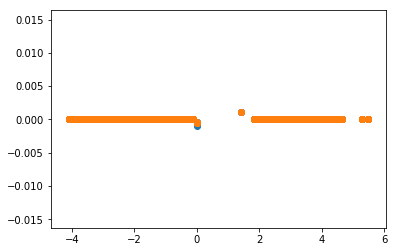

In [6]:
plt.scatter(energies,carriers_up)
plt.scatter(energies,carriers_dn)
#plt.ylim((-0.0005,0.0005))

See how the spin polarization emerges at E=1.418

In [7]:
val_indexes = []
cond_indexes = []

for ind,e in enumerate(energies):
    if e == 0.0:
        val_indexes.append(ind)

for ind,e in enumerate(energies):
    if e == 1.418:
        cond_indexes.append(ind)

print(val_indexes,cond_indexes)

[6908, 6909, 6910, 6911] [6912, 6913]


In [8]:
val_up  = [carriers_up[i] for i in val_indexes]
val_dn  = [carriers_dn[i] for i in val_indexes]
cond_up  = [carriers_up[i] for i in cond_indexes]
cond_dn  = [carriers_dn[i] for i in cond_indexes]

In [9]:
sum_cond_up = sum(cond_up)
sum_cond_dn = sum(cond_dn)
print('Total carriers',sum_cond_up+sum_cond_dn)
spin_pol_cond = (sum_cond_up-sum_cond_dn)/(sum_cond_up+sum_cond_dn)*100
sum_val_up = sum(val_up)
sum_val_dn = sum(val_dn)
spin_pol_val = (sum_val_up-sum_val_dn)/(sum_val_up+sum_val_dn)*100
print(spin_pol_cond,spin_pol_val)

Total carriers 0.004396000000000001
0.0 4.663330300272972


## k = Gamma

In [50]:
data_dir = 'rt_gamma_width40/FixSymm'
last_time = '240.000'

In [51]:
# circular polarization spanning a given frequencies range
freq_range =[1.418,1.55]
# linear polarization for a single frequency
lin_freq = 1.55
# reversed circular polarization for a single frequency
reversed_circ_freq = 1.55

We compute the total number of electrons in the conduction band, for a given frequency, (at the last simulation time) for each spin polarization

In [52]:
f = freq_range[1]
print('frequency = ',f)
file_tot = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_DATA'%(f,f)
file_up = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_up_DATA'%(f,f)
file_dn = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_dn_DATA'%(f,f)
data_tot = C.dict_parser(file_tot)
data_up = C.dict_parser(file_up)
data_dn = C.dict_parser(file_dn)

frequency =  1.55


In [53]:
energies = data_tot['E']
carriers_up = data_up[last_time]
carriers_dn = data_dn[last_time]
carriers_tot = data_tot[last_time]

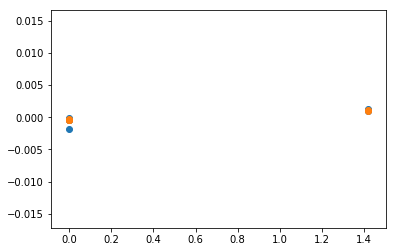

In [54]:
plt.scatter(energies,carriers_up)
plt.scatter(energies,carriers_dn)
#plt.ylim((-0.0005,0.0005))

See how the spin polarization emerges at E=1.418

In [55]:
val_indexes = []
cond_indexes = []

for ind,e in enumerate(energies):
    if e == 0.0:
        val_indexes.append(ind)

for ind,e in enumerate(energies):
    if e == 1.418:
        cond_indexes.append(ind)

print(val_indexes,cond_indexes)

[0, 1, 2, 3] [4, 5]


In [56]:
val_up  = [carriers_up[i] for i in val_indexes]
val_dn  = [carriers_dn[i] for i in val_indexes]
cond_up  = [carriers_up[i] for i in cond_indexes]
cond_dn  = [carriers_dn[i] for i in cond_indexes]

In [57]:
sum_cond_up = sum(cond_up)
sum_cond_dn = sum(cond_dn)
print('Total carriers',sum_cond_up+sum_cond_dn)
spin_pol_cond = (sum_cond_up-sum_cond_dn)/(sum_cond_up+sum_cond_dn)*100
sum_val_up = sum(val_up)
sum_val_dn = sum(val_dn)
spin_pol_val = (sum_val_up-sum_val_dn)/(sum_val_up+sum_val_dn)*100
print(spin_pol_cond,spin_pol_val)

Total carriers 0.004395700000000001
0.5391632731988123 28.66016536898581


## k = Gamma - no commutator

In [58]:
data_dir = 'rt_gamma_width40_no-commutator/FixSymm'
last_time = '240.000'

In [59]:
# circular polarization spanning a given frequencies range
freq_range =[1.418,1.55]
# linear polarization for a single frequency
lin_freq = 1.55
# reversed circular polarization for a single frequency
reversed_circ_freq = 1.55

We compute the total number of electrons in the conduction band, for a given frequency, (at the last simulation time) for each spin polarization

In [60]:
f = freq_range[1]
print('frequency = ',f)
file_tot = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_DATA'%(f,f)
file_up = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_up_DATA'%(f,f)
file_dn = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_dn_DATA'%(f,f)
data_tot = C.dict_parser(file_tot)
data_up = C.dict_parser(file_up)
data_dn = C.dict_parser(file_dn)

frequency =  1.55


In [61]:
energies = data_tot['E']
carriers_up = data_up[last_time]
carriers_dn = data_dn[last_time]
carriers_tot = data_tot[last_time]

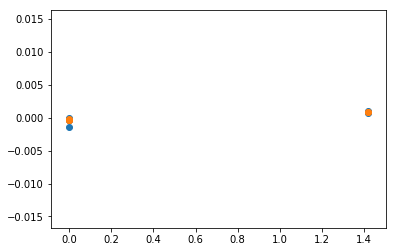

In [62]:
plt.scatter(energies,carriers_up)
plt.scatter(energies,carriers_dn)
#plt.ylim((-0.0005,0.0005))

See how the spin polarization emerges at E=1.418

In [63]:
val_indexes = []
cond_indexes = []

for ind,e in enumerate(energies):
    if e == 0.0:
        val_indexes.append(ind)

for ind,e in enumerate(energies):
    if e == 1.418:
        cond_indexes.append(ind)

print(val_indexes,cond_indexes)

[0, 1, 2, 3] [4, 5]


In [64]:
val_up  = [carriers_up[i] for i in val_indexes]
val_dn  = [carriers_dn[i] for i in val_indexes]
cond_up  = [carriers_up[i] for i in cond_indexes]
cond_dn  = [carriers_dn[i] for i in cond_indexes]

In [65]:
sum_cond_up = sum(cond_up)
sum_cond_dn = sum(cond_dn)
print('Total carriers',sum_cond_up+sum_cond_dn)
spin_pol_cond = (sum_cond_up-sum_cond_dn)/(sum_cond_up+sum_cond_dn)*100
sum_val_up = sum(val_up)
sum_val_dn = sum(val_dn)
spin_pol_val = (sum_val_up-sum_val_dn)/(sum_val_up+sum_val_dn)*100
print(spin_pol_cond,spin_pol_val)

Total carriers 0.0033513
0.5818637543639777 29.129770627968597


## Analysis of the magnetization

In [8]:
data_gamma = 'rt_gamma_mcond/FixSymm/freq_1.55-pol_circular/o-freq_1.55-pol_circular.magnetization'
data_k4 = 'rt_k4_mcond/FixSymm/freq_1.55-pol_circular/o-freq_1.55-pol_circular.magnetization'
data_k8 = 'rt_k8_mcond/FixSymm/freq_1.55-pol_circular/o-freq_1.55-pol_circular.magnetization'
data_k8_old = 'rt_k8_width40/FixSymm/freq_1.55-pol_circular/o-freq_1.55-pol_circular.magnetization'
mgns = [C.dict_parser(data_gamma),C.dict_parser(data_k4),C.dict_parser(data_k8),C.dict_parser(data_k8_old)]

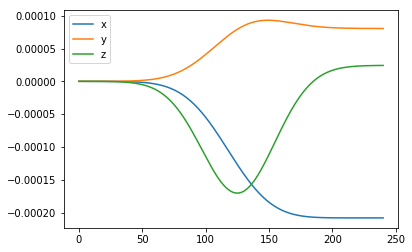

0.00022443838103478647


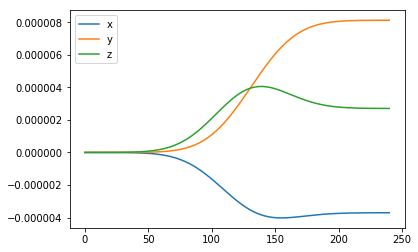

9.334815377918275e-06


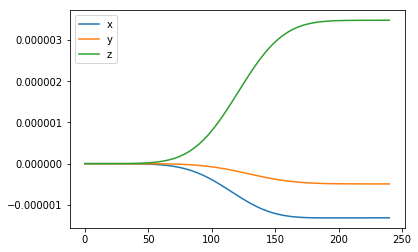

3.752392397394631e-06


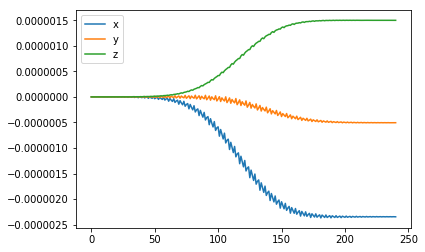

2.829935419668264e-06


In [9]:
for m in mgns:
    plt.plot(m['T'],m['Ms_x'],label = 'x')
    plt.plot(m['T'],m['Ms_y'],label = 'y')
    plt.plot(m['T'],m['Ms_z'],label = 'z')
    plt.legend()
    plt.show()
    print(np.linalg.norm(np.array([m['Ms_x'][-1],m['Ms_y'][-1],m['Ms_z'][-1]])))

In [ ]:
######################################################################

## k = 100 random (k range of 0.1 centred in Gamma)

In [14]:
data_dir = 'rt_k100_random/FixSymm'
last_time = '240.000'

In [15]:
# circular polarization spanning a given frequencies range
freq_range = [1.15,1.25,1.35,1.45,1.55,1.65,1.75,1.85]
# linear polarization for a single frequency
lin_freq = 1.55
# reversed circular polarization for a single frequency
reversed_circ_freq = 1.55

We compute the total number of electrons in the conduction band, for a given frequency, (at the last simulation time) for each spin polarization

In [16]:
f = freq_range[4]
print('frequency = ',f)
file_tot = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_DATA'%(f,f)
file_up = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_up_DATA'%(f,f)
file_dn = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_dn_DATA'%(f,f)
data_tot = C.dict_parser(file_tot)
data_up = C.dict_parser(file_up)
data_dn = C.dict_parser(file_dn)

frequency =  1.55


In [17]:
energies = data_tot['E']
carriers_up = data_up[last_time]
carriers_dn = data_dn[last_time]
carriers_tot = data_tot[last_time]

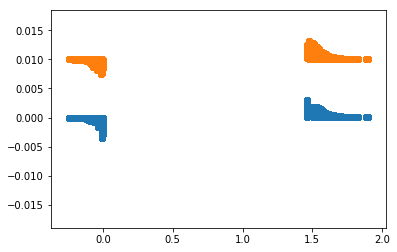

In [18]:
plt.scatter(energies,carriers_up)
plt.scatter(energies,0.01+np.array(carriers_dn))

The total number of carriers in the conduction band is computed by integrating the carriers for energies > 0

In [19]:
cond_thrs = 0
for e in energies:
    if e>0:
        cond_thrs = energies.index(e)
        break
print(cond_thrs,energies[cond_thrs])

19200 1.461


We identify the all the (positive) energy levels removing the degeneracies

In [20]:
cond_energies = energies[cond_thrs:]
cond_energies = sorted(list(set(cond_energies)))

and compute the spin polarization for a given energy level

In [23]:
eng_val = cond_energies[4]
indexes = []
for ind,e in enumerate(energies):
    if e == eng_val:
        indexes.append(ind)
#print(len(indexes))
#print(indexes)
up_bin = sum(carriers_up[slice(indexes[0],indexes[-1]+1)])
dn_bin = sum(carriers_dn[slice(indexes[0],indexes[-1]+1)])
delta = (up_bin-dn_bin)/(up_bin+dn_bin)*100
print(eng_val,delta)

1.479 -10.435086418344659


We investigate how the spin polarization for each energy level emerges. In other terms we compute the polarization
of all the states that contribute to a given energy

In [24]:
up_bins = carriers_up[slice(indexes[0],indexes[-1]+1)]
dn_bins = carriers_dn[slice(indexes[0],indexes[-1]+1)]

39.11016125898582
-39.12023460410557
87.84202265303527
-87.84790740140784
-87.84790740140784
87.84202265303527
-25.298484782703074
-25.298484782703074
25.339839665388634
25.339839665388634
39.11016125898582
-39.08450704225352
-39.08450704225352
39.11016125898582
-87.84790740140784
87.84202265303527
87.84202265303527
-87.84790740140784
-25.325464329109533
-25.325464329109533
25.339839665388634
25.339839665388634
-39.08450704225352
39.11016125898582
-39.08450704225352
39.11016125898582
-87.84790740140784
87.84202265303527
87.84202265303527
-87.84790740140784
25.339839665388634
25.339839665388634
-25.325464329109533
-25.325464329109533
-39.12023460410557
39.11016125898582
39.11016125898582
-39.12023460410557
87.84202265303527
-87.84790740140784
-87.84790740140784
87.84202265303527
25.339839665388634
25.339839665388634
-25.298484782703074
-25.298484782703074
39.11016125898582
-39.12023460410557


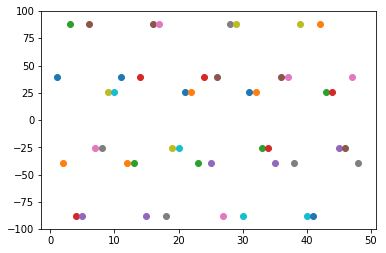

In [26]:
ind = 1
for up,dn in zip(up_bins,dn_bins): 
     print((up-dn)/(up+dn)*100)
     plt.scatter(ind,(up-dn)/(up+dn)*100)
     ind+=1

We plot the (integrated inside each level) polarization for all the energies

In [27]:
spin_pol = []
for eng_val in cond_energies:
    indexes = []
    for ind,e in enumerate(energies):
        if e == eng_val:
            indexes.append(ind)
    #print(len(indexes))
    up_bin = sum(carriers_up[slice(indexes[0],indexes[-1]+1)])
    dn_bin = sum(carriers_dn[slice(indexes[0],indexes[-1]+1)])
    spin_pol.append((up_bin-dn_bin)/(up_bin+dn_bin)*100)  


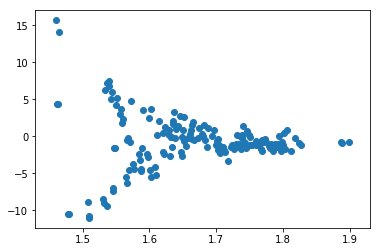

In [28]:
plt.scatter(cond_energies,spin_pol)

## k = 8x8x8 - low intensity - no commutator

In [59]:
data_dir = 'rt_k8_low-int_no-commutator/FixSymm'
last_time = '240.000'

In [60]:
# circular polarization spanning a given frequencies range
freq_range =[1.418,1.55]
# linear polarization for a single frequency
lin_freq = 1.55
# reversed circular polarization for a single frequency
reversed_circ_freq = 1.55

We compute the total number of electrons in the conduction band, for a given frequency, (at the last simulation time) for each spin polarization

In [68]:
f = freq_range[0]
print('frequency = ',f)
file_tot = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_DATA'%(f,f)
file_up = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_up_DATA'%(f,f)
file_dn = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_dn_DATA'%(f,f)
data_tot = C.dict_parser(file_tot)
data_up = C.dict_parser(file_up)
data_dn = C.dict_parser(file_dn)

frequency =  1.418


In [69]:
energies = data_tot['E']
carriers_up = data_up[last_time]
carriers_dn = data_dn[last_time]
carriers_tot = data_tot[last_time]

(-0.0005, 0.0005)

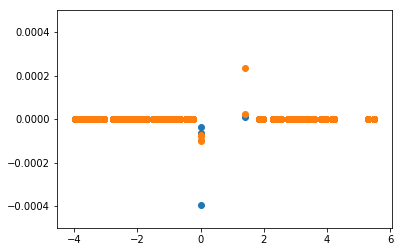

In [70]:
plt.scatter(energies,carriers_up)
plt.scatter(energies,carriers_dn)
plt.ylim((-0.0005,0.0005))

See how the spin polarization emerges at E=1.418

In [71]:
val_indexes = []
cond_indexes = []

for ind,e in enumerate(energies):
    if e == 0.0:
        val_indexes.append(ind)

for ind,e in enumerate(energies):
    if e == 1.418:
        cond_indexes.append(ind)

print(val_indexes,cond_indexes)

[2044, 2045, 2046, 2047] [2048, 2049]


In [72]:
val_up  = [carriers_up[i] for i in val_indexes]
val_dn  = [carriers_dn[i] for i in val_indexes]
cond_up  = [carriers_up[i] for i in cond_indexes]
cond_dn  = [carriers_dn[i] for i in cond_indexes]

In [73]:
sum_cond_up = sum(cond_up)
sum_cond_dn = sum(cond_dn)
spin_pol_cond = (sum_cond_up-sum_cond_dn)/(sum_cond_up+sum_cond_dn)*100
sum_val_up = sum(val_up)
sum_val_dn = sum(val_dn)
spin_pol_val = (sum_val_up-sum_val_dn)/(sum_val_up+sum_val_dn)*100
print(spin_pol_cond,spin_pol_val)

42.877179982533676 23.493351562327724
